In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif




In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [9]:
rna_exp = pd.read_csv('data.csv', index_col=[0])
labels = pd.read_csv('labels.csv' , index_col=[0])
rna_exp.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [10]:
labels.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


In [17]:
pd.unique(labels.Class) #number of unique classes in labels

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [20]:
rna_merged = pd.concat([rna_exp,labels],axis=1) #concatenating two datasets
rna_merged.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [26]:
rna_merged.shape  #total unique values

(801, 20532)

In [36]:
exp = rna_merged.set_index('Class').sort_index() #sorting the label class

In [37]:
exp.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.0,3.801873,5.025591,6.404150,9.564754,0.0,9.997688,1.025241,0.0,0.0,...,5.919628,8.507347,9.849333,8.184360,9.796564,11.607552,10.456272,9.949412,5.980037,0.000000
BRCA,0.0,3.277330,2.629846,6.000487,9.627027,0.0,8.375748,1.029559,0.0,0.0,...,6.152192,9.015499,10.244994,5.172335,9.788066,11.582057,11.098776,9.909158,5.494595,0.000000
BRCA,0.0,1.149975,0.462576,5.861427,10.092440,0.0,5.445833,1.045932,0.0,0.0,...,6.494526,9.549727,10.037602,6.636375,9.459339,10.109922,10.442394,9.574616,3.541862,0.000000
BRCA,0.0,4.538159,3.955722,6.259862,9.103243,0.0,6.918327,1.162726,0.0,0.0,...,7.102994,9.813018,10.629311,7.128757,10.409104,11.195225,11.169593,10.513451,6.729131,0.270828
BRCA,0.0,2.599770,2.562792,7.365491,10.462155,0.0,7.922370,0.000000,0.0,0.0,...,5.036873,8.267555,9.630254,5.531385,9.241642,11.459872,10.045882,9.091528,9.356654,0.000000


In [38]:
exp.shape

(801, 20531)

In [39]:
exp.describe() #checking if there are null values and returning more information 

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [40]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, BRCA to PRAD
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5+ MB


In [49]:
exp.isnull().any().any()   #There are no null values

False

C:\Users\Dell\anaconda3\envs\capstone\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


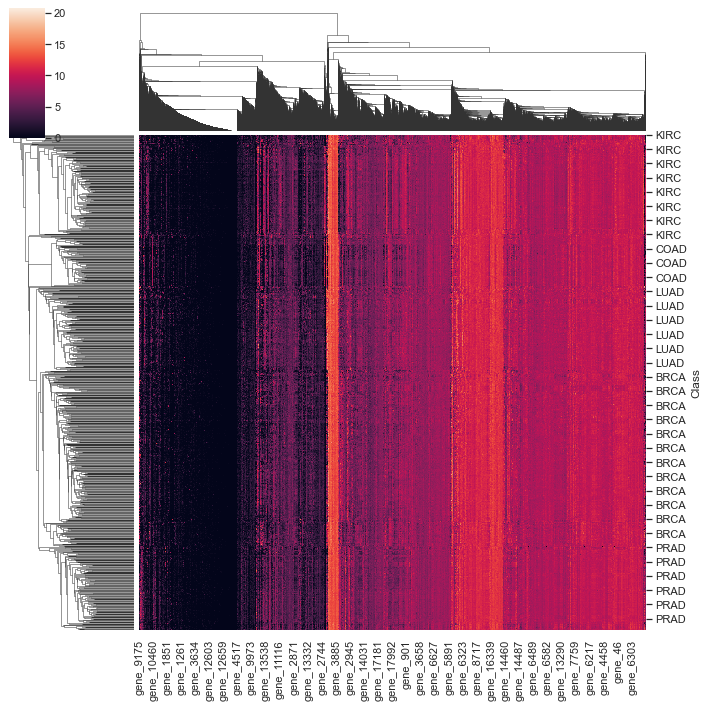

In [51]:
#plotting our dataset as heirarchically clusteres heatmap
sns.clustermap(exp)

Text(0.5, 1.0, 'Distribution of label types in Genes data')

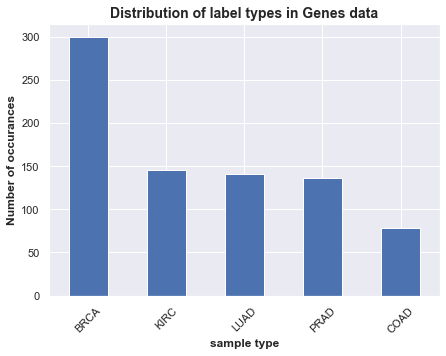

In [54]:
#visualizing the distribution of levels
fig = plt.figure(figsize=(7,5))
exp.index.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Number of occurances', fontsize=12,fontweight='bold')
plt.xlabel('sample type', fontsize=12,fontweight='bold')
plt.title('Distribution of label types in Genes data',fontsize=14,fontweight='bold')

In [55]:
#Data Preparation
features = list(exp.columns.values)
len(features)

20531

In [56]:
x = rna_exp[features].reset_index(drop=True)
y = labels

In [57]:
x.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [58]:
y.index = np.arange(0,801)
y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


In [59]:
#created our x and y
#Now we have to standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
scaled_data

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [61]:
## Hypothesis
# We have 5 categories of the output response.Lets test whether 5 categories are similiar to one another based on the gene expr of our very first 0th col
# we used statsmodel for feature selection using backward elimination

from scipy import stats


In [65]:
grps = pd.unique(y['Class'])
d_data = {grp:x['gene_0'][y.Class == grp] for grp in grps}


In [66]:
#Now data is ready lets put 5% threshold that if out p values comes under 5% we can reject null hypothesis for gene_0

F,p = stats.f_oneway(d_data['PRAD'], d_data['LUAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

print("p-value for significance is:", p)

if p<0.05:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')
    
   


p-value for significance is: 0.07505540778266195
Accept null hypothesis


In [67]:
#lets check for gene1  and gene2

d_data = {grp:x['gene_1'][y.Class == grp] for grp in grps}

F,p = stats.f_oneway(d_data['PRAD'], d_data['LUAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

print("p-value for significance is:", p)

if p<0.05:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p-value for significance is: 4.315349359726914e-18
Reject null hypothesis


In [68]:
#for gene2
d_data = {grp:x['gene_2'][y.Class == grp] for grp in grps}

F,p = stats.f_oneway(d_data['PRAD'], d_data['LUAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

print("p-value for significance is:", p)

if p<0.05:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')


p-value for significance is: 2.1468844023159446e-44
Reject null hypothesis


In [69]:
#gene 3

d_data = {grp:x['gene_3'][y.Class == grp] for grp in grps}

F,p = stats.f_oneway(d_data['PRAD'], d_data['LUAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

print("p-value for significance is:", p)

if p<0.05:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p-value for significance is: 5.472971016870503e-77
Reject null hypothesis


In [70]:
#we have enough evidence based upon the p-value based on which we can reject the null hypothesis
#that all the 5 categories are not similiar(enough evidence from gene_1,gene_2,gene_3)

In [71]:
#DIMENSIONALITY REDUCTION



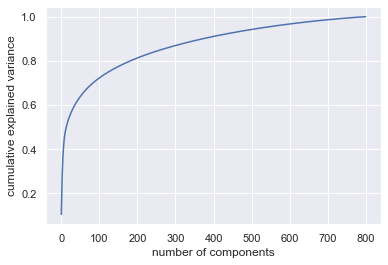

In [84]:
#PCA
pca_plot = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca_plot.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [85]:
#In order to explain 95% of the data we need more than 450 principal components.Hence PCA doesnot seem to be a good component

In [105]:
#lets try to reduce the 20k components to  lets visualize
pca = PCA(n_components=2)
principal_component = pca.fit_transform(x)


In [106]:
principal_df = pd.DataFrame(data=principal_component, columns=['principal component 1' , 'principal component 2'])

In [107]:
principal_df.head()

,principal component 1,principal component 2
0,-62.755415,-94.071973
1,-2.432896,90.585842
2,-71.266853,-8.064608
3,-84.770785,-73.244566
4,-69.560171,-9.612940


In [108]:
concat_pca_df = principal_df.copy()

In [109]:
concat_pca_df['Class'] = y['Class']

In [110]:
concat_pca_df.head()

,principal component 1,principal component 2,Class
0,-62.755415,-94.071973,PRAD
1,-2.432896,90.585842,LUAD
2,-71.266853,-8.064608,PRAD
3,-84.770785,-73.244566,PRAD
4,-69.560171,-9.612940,BRCA


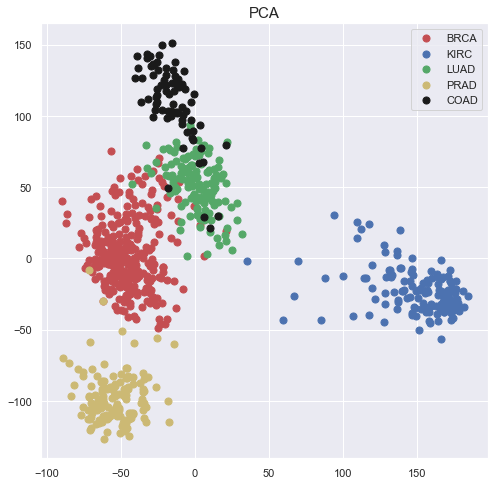

In [111]:
#plotting the sample with reduced dimensions
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('PCA', fontsize=15)
labels_list = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors = ['r', 'b', 'g', 'y', 'k']

for lab, color in zip(labels_list,colors):
    indices = concat_pca_df['Class'] == lab
    ax.scatter(concat_pca_df.loc[indices, 'principal component 1']
               ,concat_pca_df.loc[indices, 'principal component 2']
               ,c = color
               ,s = 50)
    ax.legend(labels_list)          

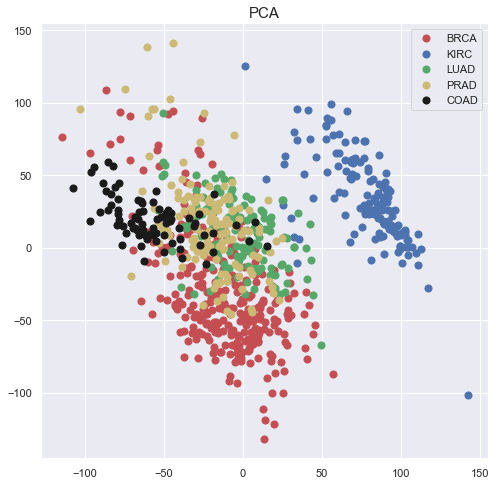

In [112]:
#Lets test it with the scaled data

principal_component_scaled = pca.fit_transform(scaled_data)
principal_df_scaled = pd.DataFrame(data=principal_component_scaled, columns=['principal component 1' , 'principal component 2'])
principal_df_scaled['Class'] = y['Class']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('PCA', fontsize=15)
labels_list = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors = ['r', 'b', 'g', 'y', 'k']

for lab, color in zip(labels_list,colors):
    indices = principal_df_scaled['Class'] == lab
    ax.scatter(principal_df_scaled.loc[indices, 'principal component 1']
               ,principal_df_scaled.loc[indices, 'principal component 2']
               ,c = color
               ,s = 50)
    ax.legend(labels_list)


In [113]:
#Hence PCA is not able to give proper clusters on scaled data

In [114]:
##Lets try with LDA

In [115]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_rnaexp = lda.fit_transform(scaled_data,y['Class'])

In [116]:
lda_df = pd.DataFrame(data=lda_rnaexp, columns=['LDA1', 'LDA2'])

In [117]:
lda_df.head()

,LDA1,LDA2
0,-7.958125,-10.922818
1,-0.301563,2.780898
2,-6.424952,-8.870978
3,-6.934259,-10.417199
4,-2.872004,4.912284


In [118]:
lda_concat_df = pd.concat([lda_df, y['Class']], axis=1)

In [119]:
lda_concat_df.head()

,LDA1,LDA2,Class
0,-7.958125,-10.922818,PRAD
1,-0.301563,2.780898,LUAD
2,-6.424952,-8.870978,PRAD
3,-6.934259,-10.417199,PRAD
4,-2.872004,4.912284,BRCA


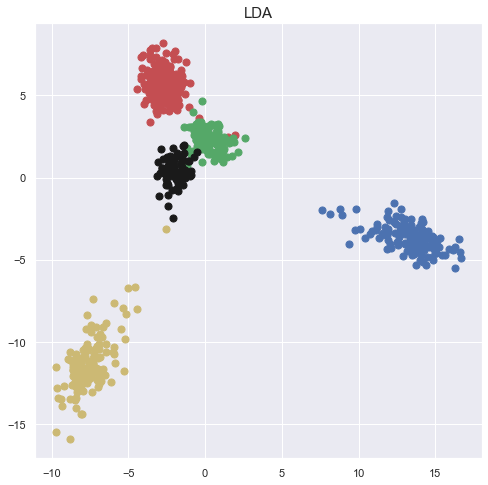

In [124]:
fig_3 = plt.figure(figsize=(8,8))
ax_3 = fig_3.add_subplot(1,1,1)
ax_3.set_title('LDA', fontsize=15)
labels_list_3 = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors_3 = ['r', 'b', 'g', 'y', 'k']

for lab, color in zip(labels_list_3,colors_3):
    indices_3 = lda_concat_df['Class'] == lab
    ax_3.scatter(lda_concat_df.loc[indices_3, 'LDA1']
               ,lda_concat_df.loc[indices_3, 'LDA2']
               ,c = color
               ,s = 50)
    ax.legend(labels_list)          

In [125]:
#looks better with teh scaled data using LDA

In [135]:
#Lets try some clustering technique to group the data
#lets try with agglomerative clustering

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = cluster.fit_predict(principal_df)

In [136]:
pca_df = pd.concat([principal_df,pd.DataFrame(y_hc,columns=['label'])],axis=1)

In [137]:
pca_df.head()

,principal component 1,principal component 2,label
0,-62.755415,-94.071973,2
1,-2.432896,90.585842,3
2,-71.266853,-8.064608,0
3,-84.770785,-73.244566,2
4,-69.560171,-9.612940,0


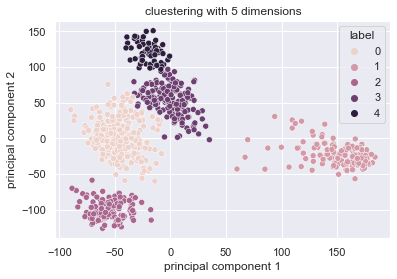

In [142]:
import seaborn as sns
sns.scatterplot(x="principal component 1", y="principal component 2", hue=pca_df['label'], data=pca_df)
plt.title('cluestering with 5 dimensions')
plt.show()

In [152]:
#Lets try with mean shift clustering
from sklearn.cluster import MeanShift


In [156]:
ms = MeanShift(bandwidth=35)
ms.fit(principal_df)
centroids = ms.cluster_centers_


In [157]:
centroids

array([[ -48.62700841,   -4.77888429],
       [  -2.89619079,   52.28526888],
       [ -55.01100906, -100.47360515],
       [ 159.80946422,  -26.32625708],
       [ -17.86509242,  117.54477595]])

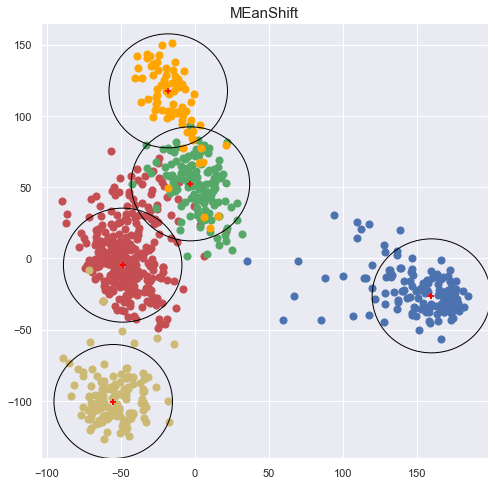

In [160]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('MEanShift', fontsize=15)
labels_list = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors = ['r', 'b', 'g', 'y', 'orange']

for lab, color,center in zip(labels_list,colors,centroids):
    indices = concat_pca_df['Class'] == lab
    ax.scatter(concat_pca_df.loc[indices, 'principal component 1']
               ,concat_pca_df.loc[indices, 'principal component 2']
               ,c = color
               ,s = 50)
    ax.scatter(centroids[:,0], centroids[:,1], c='red', marker='+') 
    circle = plt.Circle(center,40,color='black', fill=False, clip_on=True)
    plt.gca().add_artist(circle)

In [161]:
##BUILDING CLASSIFICATION MODEL WITH FEATURE SELECTION



In [162]:
x.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [163]:
y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


In [164]:
principal_df.head()

,principal component 1,principal component 2
0,-62.755415,-94.071973
1,-2.432896,90.585842
2,-71.266853,-8.064608
3,-84.770785,-73.244566
4,-69.560171,-9.612940


In [165]:
validation_size = 0.15
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(principal_df, y['Class'],test_size=validation_size, random_state= seed)

In [167]:
X_train.shape

(680, 2)

In [170]:
import warnings
scoring = 'accuracy'
warnings.filterwarnings(action='ignore', category=UserWarning)

In [175]:
#spotcheck algorithm
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC(kernel='rbf')))
models.append(('RF', RandomForestClassifier()))              

In [176]:
results =[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10, shuffle= True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.958824 (0.025301)
KNN: 0.957353 (0.027473)
CART: 0.938235 (0.026142)
NB: 0.944118 (0.024431)
SVM: 0.954412 (0.020217)
RF: 0.961765 (0.025641)


In [177]:
Y_train.head()

371    COAD
541    BRCA
728    BRCA
318    KIRC
464    COAD
Name: Class, dtype: object

In [181]:
#lets try with neural network
#lets make y categorical

encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)
dummy_y = np_utils.to_categorical(encoded_Y)


In [182]:
dummy_y

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [184]:
def baseline_model():
    #create model
    model= Sequential()
    model.add(Dense(10,input_dim=2, activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(5,activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [185]:
Y_train.shape

(680,)

In [186]:
estimator = KerasClassifier(build_fn=baseline_model,epochs=10,batch_size=2,verbose=0)
kfold = KFold(n_splits=5,shuffle=True)
result = cross_val_score(estimator, X_train,dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (result.mean()*100, result.std()*100))

Baseline: 90.74% (1.36%)


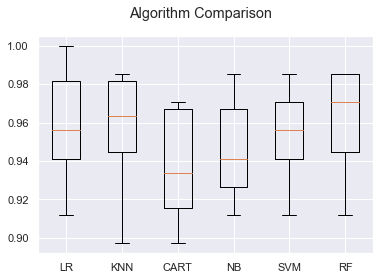

In [188]:
#lets compare the models in box plot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [189]:
#Based on the compariosn Random forest is performing well because the mean is as close as we want to get the true results.
#This model also give less std hence deviation in results from the actual mean as compared to other algo.

In [191]:
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)
predictions = classifier.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.9173553719008265
[[39  0  0  1  0]
 [ 0 10  0  2  0]
 [ 0  0 18  1  0]
 [ 3  2  0 20  0]
 [ 1  0  0  0 24]]
              precision    recall  f1-score   support

        BRCA       0.91      0.97      0.94        40
        COAD       0.83      0.83      0.83        12
        KIRC       1.00      0.95      0.97        19
        LUAD       0.83      0.80      0.82        25
        PRAD       1.00      0.96      0.98        25

    accuracy                           0.92       121
   macro avg       0.91      0.90      0.91       121
weighted avg       0.92      0.92      0.92       121

